# Binary Variable Models

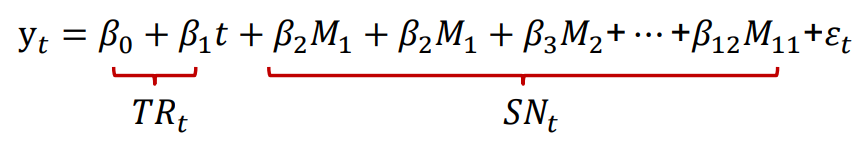

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

In [ ]:
hotel_data = pd.read_csv('./dataset/example-hotel-rooms.csv')

In [ ]:
hotel_data.head(10)

In [ ]:
hotel_data.shape

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(hotel_data['y'], marker='o')
plt.title('Hotel rooms occupied for 14 years', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Occupied', fontsize=12)

plt.show()

In [ ]:
hotel_data['month'] = hotel_data['t'] % 12
hotel_data['month'].tail(20)

In [ ]:
hotel_dummy = pd.get_dummies(hotel_data['month'], drop_first=True)
hotel_dummy.rename(columns = lambda x: "m" + str(x), inplace=True)
hotel_dummy

In [ ]:
binary_hotel_data = pd.concat([hotel_data, hotel_dummy], axis=1)
binary_hotel_data

In [ ]:
binary_hotel_data['log_y'] = np.log(binary_hotel_data['y'])
binary_hotel_data

In [ ]:
binary_hotel_model = ols('log_y ~ t+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11', data=binary_hotel_data).fit()
binary_hotel_model.summary()

In [ ]:
y_169 = binary_hotel_model.params['Intercept'] + 169*binary_hotel_model.params['t'] + binary_hotel_model.params['m1']
pred_169 = np.exp(y_169)
print(f'[Binary variables] prediction of 169 months is {pred_169:.2f}')

In [ ]:
pred_columns = binary_hotel_data.drop(['y', 'month'], axis=1).columns
pred_binary_hotel = binary_hotel_model.predict(binary_hotel_data[pred_columns])
pred_binary_hotel = np.exp(pred_binary_hotel)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(binary_hotel_data['t'], binary_hotel_data['y'], color='royalblue')
plt.plot(binary_hotel_data['t'], pred_binary_hotel, color='darkorange')
plt.title('Prediction of "Binary varaible models" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

# Trigonometric Models

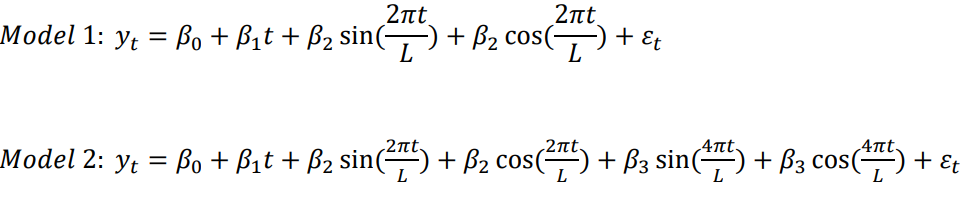

In [ ]:
# make variables in trigonometric model 
# if standard is month, time_stand=12, if standard is day, time_stand=365 
time_stand = 12
hotel_data['sintwo'] = np.sin(2*np.pi*hotel_data['t'] / time_stand)
hotel_data['costwo'] = np.cos(2*np.pi*hotel_data['t'] / time_stand)
hotel_data['sinfour'] = np.sin(4*np.pi*hotel_data['t'] / time_stand)
hotel_data['cosfour'] = np.cos(4*np.pi*hotel_data['t'] / time_stand)
hotel_data['log_y'] = np.log(hotel_data['y'])

hotel_data

In [ ]:
tri_hotel_model_1 = ols('log_y ~ t+sintwo+costwo', data=hotel_data).fit()
tri_hotel_model_1.summary()

In [ ]:
pred_columns_tri_1 = hotel_data.drop(['y', 'month'], axis=1).columns
pred_tri_1_hotel = tri_hotel_model_1.predict(hotel_data[pred_columns_tri_1])
pred_tri_1_hotel = np.exp(pred_tri_1_hotel)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue')
plt.plot(hotel_data['t'], pred_tri_1_hotel, color='darkorange')
plt.title('Prediction of "Trigonometric models (1)" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

In [ ]:
tri_hotel_model_2 = ols('log_y ~ t+sintwo+costwo+sinfour+cosfour', data=hotel_data).fit()
tri_hotel_model_2.summary()

In [ ]:
y_add = np.pi*169 / time_stand
y_169_tri = tri_hotel_model_2.params['Intercept'] + 169*tri_hotel_model_2.params['t'] + np.sin(2*y_add)*tri_hotel_model_2.params['sintwo'] + np.cos(2*y_add)*tri_hotel_model_2.params['costwo'] + np.sin(4*y_add)*tri_hotel_model_2.params['sinfour'] +np.cos(4*y_add)*tri_hotel_model_2.params['cosfour']
pred_169_tri = np.exp(y_169_tri)
print(f'[Trigonometric] prediction of 169 months is {pred_169_tri:.2f}')

In [ ]:
pred_columns_tri_2 = hotel_data.drop(['y', 'month'], axis=1).columns
pred_tri_2_hotel = tri_hotel_model_2.predict(hotel_data[pred_columns_tri_2])
pred_tri_2_hotel = np.exp(pred_tri_2_hotel)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue')
plt.plot(hotel_data['t'], pred_tri_2_hotel, color='darkorange')
plt.title('Prediction of "Trigonometric models (2)" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

In [ ]:
# plotting predicion value and real value about 
fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue')
plt.plot(hotel_data['t'], pred_tri_1_hotel, color='crimson')
plt.plot(hotel_data['t'], pred_tri_2_hotel, color='darkorange')
plt.plot(binary_hotel_data['t'], pred_binary_hotel, color='g')
plt.title('Prediction of various models in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

In [ ]:
def MAD(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [ ]:
# caluate a MAD(MAE)
mad_bin = MAD(hotel_data['y'], pred_binary_hotel )
print(f'MAD of binary variables models = {mad_bin:.2f}')
mad_tri_1 = MAD(hotel_data['y'], pred_tri_1_hotel)
print(f'MAD of trigonometric models (1) = {mad_tri_1:.2f}')
mad_tri_2 = MAD(hotel_data['y'], pred_tri_2_hotel)
print(f'MAD of trigonometric models (2)  = {mad_tri_2:.2f}')

In [ ]:
# caluate a MAD(MAE)
mse_bin = MSE(hotel_data['y'], pred_binary_hotel )
print(f'MSE of binary variables models = {mse_bin:.2f}')
mse_tri_1 = MSE(hotel_data['y'], pred_tri_1_hotel)
print(f'MSE of trigonometric models (1) = {mse_tri_1:.2f}')
mse_tri_2 = MSE(hotel_data['y'], pred_tri_2_hotel)
print(f'MSE of trigonometric models (2)  = {mse_tri_2:.2f}')

# Growth Curve Models

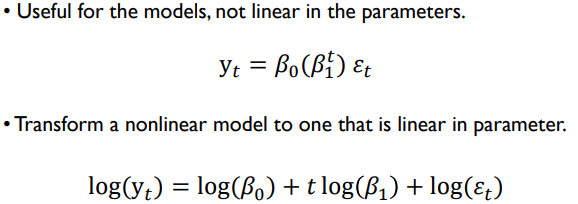

In [ ]:
steak_data = pd.read_csv('./dataset/example-steakhouses.csv')
steak_data.head(5)

In [ ]:
steak_data['log_y'] = np.log(steak_data['y'])
steak_data.head(5)

In [ ]:
steak_model = ols('log_y ~ t', data=steak_data).fit()
steak_model.summary()

In [ ]:
log_y_16_pred = steak_model.params['Intercept'] + 16*steak_model.params['t']
print(f'prediction of log_y = {log_y_16_pred:.2f}')
pred_y_16 = np.exp(log_y_16_pred)
print(f'prediction of y = {pred_y_16:.2f}')

In [ ]:
pred_steak = steak_model.predict(steak_data['t'])
pred_steak = np.exp(pred_steak)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(steak_data['t'], steak_data['y'], color='royalblue')
plt.plot(steak_data['t'], pred_steak, color='darkorange')
plt.title('Prediction of "Growth Curve Models" in steak data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Western staek house', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()